In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import sklearn as sl
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_excel(r'data.xlsx')

In [ ]:
# Полученние значений независимых переменных
df_x = df.loc[:, ['х1', 'х2', 'х3', 'х4', 'х5', 'х6', 'x7', 'x8', 'x9']]
x_matrix = df_x.to_numpy()
print(x_matrix)

[[8.500e+00 1.630e+01 6.800e+00 5.600e+00 1.740e+01 1.630e+02 1.510e+02
  2.360e+01 2.344e+03]
 [9.300e+00 1.260e+01 7.200e+00 5.500e+00 2.530e+01 1.940e+02 2.390e+02
  9.200e+00 1.809e+03]
 [8.700e+00 4.600e+00 6.500e+00 4.200e+00 1.620e+01 1.520e+02 1.920e+02
  2.690e+01 2.406e+03]
 [8.600e+00 6.200e+00 6.100e+00 4.000e+00 1.740e+01 1.900e+02 2.050e+02
  2.010e+01 2.023e+03]
 [8.100e+00 1.140e+01 7.700e+00 6.400e+00 5.900e+00 1.830e+02 1.980e+02
  2.200e+01 1.419e+03]
 [7.000e+00 1.590e+01 8.200e+00 5.100e+00 1.380e+01 2.290e+02 1.720e+02
  2.000e+01 2.104e+03]
 [7.200e+00 1.820e+01 7.400e+00 6.100e+00 1.430e+01 1.460e+02 1.670e+02
  2.910e+01 2.489e+03]
 [7.900e+00 1.970e+01 6.400e+00 4.700e+00 1.980e+01 1.740e+02 1.440e+02
  2.280e+01 2.428e+03]
 [7.700e+00 2.080e+01 6.900e+00 5.200e+00 1.710e+01 1.280e+02 1.110e+02
  4.270e+01 2.494e+03]
 [9.200e+00 1.590e+01 7.800e+00 5.300e+00 1.670e+01 1.690e+02 1.480e+02
  2.270e+01 2.094e+03]
 [7.600e+00 1.640e+01 6.700e+00 4.700e+00 1.550e+0

In [4]:
# Получение значений зависимой переменной
df_y = df.loc[:, ['Y']]
y_matrix = df_y.to_numpy()
print(y_matrix)

[[54.7]
 [57. ]
 [71. ]
 [57.6]
 [57.7]
 [59.9]
 [55.5]
 [55.3]
 [55.8]
 [60.1]
 [58.5]
 [57.4]
 [58.5]
 [58.3]
 [58.2]
 [56.5]
 [59.2]
 [58.1]
 [58.8]
 [56.5]
 [57.1]
 [58.3]
 [61.9]
 [61. ]
 [60.2]
 [59.5]
 [59.3]
 [60.2]
 [57.5]
 [68.9]
 [59. ]
 [56.9]
 [57.7]
 [58. ]
 [55.1]
 [58.3]
 [55.4]
 [59.1]
 [60.6]
 [58.2]
 [57.8]
 [57.2]
 [49.7]
 [56. ]
 [56. ]
 [54.7]
 [56.2]]


In [5]:
# Определение ф-ций для вычисления MSE и R2
def mse_error(y, y_predict):
    return (1 / y.shape[0]) * pow((y - y_predict), 2).sum()

def r2_coef(y, y_predict):
    sse = pow((y - y_predict), 2).sum()
    sst = pow((y - np.full(y.shape, y.mean())), 2).sum()
    return 1 - (sse / sst)

In [6]:
# Нормализация входных данных
scaler = MinMaxScaler()
scaler.fit(x_matrix)
x_normalized = scaler.transform(x_matrix)

In [7]:
x_normalized = np.hstack((np.ones((x_normalized.shape[0],1)), x_normalized))
print(x_normalized.round(3))

[[1.    0.115 0.722 0.391 0.822 0.52  0.181 0.256 0.225 0.745]
 [1.    0.177 0.494 0.565 0.8   0.878 0.252 0.708 0.    0.435]
 [1.    0.131 0.    0.261 0.511 0.466 0.156 0.467 0.277 0.781]
 [1.    0.123 0.099 0.087 0.467 0.52  0.243 0.533 0.17  0.559]
 [1.    0.085 0.42  0.783 1.    0.    0.227 0.497 0.2   0.209]
 [1.    0.    0.698 1.    0.711 0.357 0.333 0.364 0.169 0.606]
 [1.    0.015 0.84  0.652 0.933 0.38  0.142 0.338 0.311 0.829]
 [1.    0.069 0.932 0.217 0.622 0.629 0.206 0.221 0.213 0.794]
 [1.    0.054 1.    0.435 0.733 0.507 0.101 0.051 0.523 0.832]
 [1.    0.169 0.698 0.826 0.756 0.489 0.195 0.241 0.211 0.6  ]
 [1.    0.046 0.728 0.348 0.622 0.434 0.138 0.251 0.292 0.411]
 [1.    0.023 0.846 0.174 0.667 0.62  0.124 0.164 0.383 0.535]
 [1.    0.069 0.728 0.391 0.689 0.529 0.259 0.277 0.272 0.326]
 [1.    0.069 0.765 0.174 0.556 0.643 0.225 0.297 0.333 0.332]
 [1.    0.077 0.759 1.    0.6   0.434 1.    0.492 0.155 0.004]
 [1.    0.015 0.802 0.957 0.733 0.462 0.135 0.328 0.344

In [8]:
# Расчет весов аналитическим методом
w_analytics = np.linalg.inv(x_normalized.T.dot(x_normalized)).dot(x_normalized.T).dot(y_matrix)
print(w_analytics)

[[ 70.14870374]
 [-18.24961045]
 [-12.16413401]
 [  6.44822934]
 [ -7.8789627 ]
 [  2.44497871]
 [ -2.06964164]
 [ -3.95963339]
 [  0.34540247]
 [  1.11955458]]


In [9]:
# Получение корреляционной матрицы
corr_matrix = df_x.corr()
print(corr_matrix)

          х1        х2        х3        х4        х5        х6        x7  \
х1  1.000000 -0.404243 -0.278832 -0.658929  0.575729 -0.231684 -0.116384   
х2 -0.404243  1.000000  0.135790  0.221146 -0.081761  0.047468 -0.330497   
х3 -0.278832  0.135790  1.000000  0.465670 -0.308264  0.416815  0.243507   
х4 -0.658929  0.221146  0.465670  1.000000 -0.456925  0.248832  0.301072   
х5  0.575729 -0.081761 -0.308264 -0.456925  1.000000 -0.132509 -0.022181   
х6 -0.231684  0.047468  0.416815  0.248832 -0.132509  1.000000  0.530161   
x7 -0.116384 -0.330497  0.243507  0.301072 -0.022181  0.530161  1.000000   
x8  0.605914 -0.127129 -0.353327 -0.533690  0.270416 -0.550294 -0.558547   
x9  0.309320 -0.195959 -0.516201 -0.127218  0.296478 -0.375689 -0.148143   

          x8        x9  
х1  0.605914  0.309320  
х2 -0.127129 -0.195959  
х3 -0.353327 -0.516201  
х4 -0.533690 -0.127218  
х5  0.270416  0.296478  
х6 -0.550294 -0.375689  
x7 -0.558547 -0.148143  
x8  1.000000  0.454819  
x9  0.454819  

In [10]:
# Число обусловленности
cond_num = np.linalg.cond(corr_matrix)
print(cond_num)

20.84089885169495


In [11]:
y_predict_analytics = x_normalized.dot(w_analytics)
print(y_predict_analytics)

[[56.09641562]
 [57.56310234]
 [65.355987  ]
 [62.92684687]
 [58.52917211]
 [61.98975184]
 [56.83805919]
 [55.2457432 ]
 [55.96686981]
 [58.53081728]
 [58.12986536]
 [56.65021044]
 [57.24060697]
 [56.73292231]
 [58.33105305]
 [60.24458773]
 [59.42839378]
 [58.30757799]
 [57.94346888]
 [56.49090475]
 [57.40078889]
 [57.07265131]
 [58.47749777]
 [59.65938585]
 [60.78012229]
 [58.73868006]
 [58.72994788]
 [58.26229193]
 [60.36840055]
 [61.89709496]
 [60.65303985]
 [55.90899897]
 [57.70130032]
 [57.6928707 ]
 [55.49899761]
 [60.76883181]
 [54.14669169]
 [60.39147185]
 [59.37390362]
 [58.62563527]
 [57.94632942]
 [57.86244929]
 [49.45562009]
 [58.52096171]
 [55.49839718]
 [55.82419349]
 [58.60108912]]


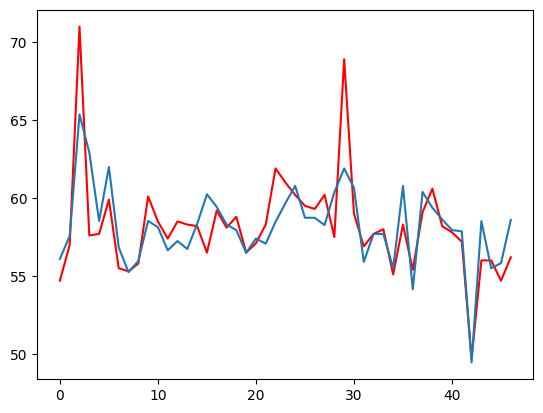

In [12]:
fig, ax = plt.subplots()

ax.plot(y_matrix, color='red')
ax.plot(y_predict_analytics)

plt.show()

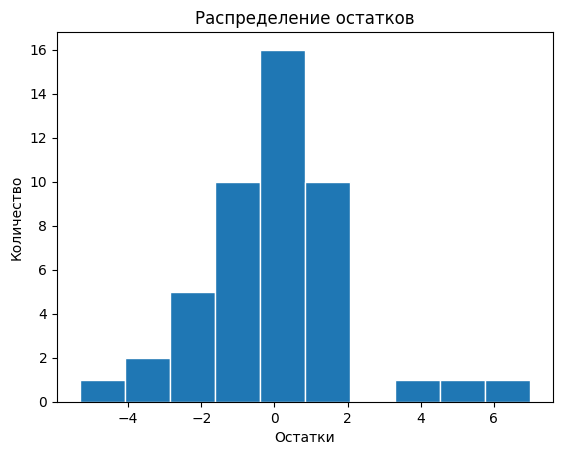

In [13]:
#График распределения остатков
fig, ax_hist = plt.subplots()
ax_hist.hist(y_matrix - y_predict_analytics, edgecolor='white')

ax_hist.set_xlabel('Остатки')
ax_hist.set_ylabel('Количество')
ax_hist.set_title('Распределение остатков')

plt.show()

In [14]:
# Вычисление весов градиентным методом
w_grad = np.ones((10,1))
learn_speed = 0.1
eps = 0.00000001
n = y_matrix.shape[0]

mse = 0
mse_prev = -1
mse_list = []

while abs(mse - mse_prev) >= eps:
    y_calc = x_normalized.dot(w_grad)
    diff = y_matrix - y_calc

    mse_prev = mse
    mse = mse_error(y_matrix, y_calc)
    mse_list.append(mse)
    
    grad_mse = (-2 / n) * (x_normalized.T.dot(diff))
    w_grad = w_grad - learn_speed * grad_mse

print(w_grad)

[[ 70.13229064]
 [-18.24056497]
 [-12.16073785]
 [  6.44356761]
 [ -7.86134037]
 [  2.44818867]
 [ -2.06354781]
 [ -3.95779803]
 [  0.35461017]
 [  1.1158763 ]]


In [15]:
y_predict_grad = x_normalized.dot(w_grad)
print(y_predict_grad)

[[56.0987411 ]
 [57.56548452]
 [65.35152484]
 [62.92334421]
 [58.53229453]
 [61.9867452 ]
 [56.8405652 ]
 [55.24579248]
 [55.96933174]
 [58.53070186]
 [58.12955973]
 [56.6524181 ]
 [57.24270149]
 [56.73453728]
 [58.33362714]
 [60.24531235]
 [59.42757919]
 [58.30561444]
 [57.94203247]
 [56.49095935]
 [57.40068578]
 [57.07242477]
 [58.47775019]
 [59.65730804]
 [60.77531451]
 [58.73726601]
 [58.72773976]
 [58.26173087]
 [60.36367844]
 [61.89636717]
 [60.65337767]
 [55.9068603 ]
 [57.70084035]
 [57.69296707]
 [55.49953992]
 [60.7680869 ]
 [54.14941544]
 [60.38972112]
 [59.37260813]
 [58.6275516 ]
 [57.94967479]
 [57.86167233]
 [49.45890421]
 [58.52046497]
 [55.50000553]
 [55.82174136]
 [58.60325301]]


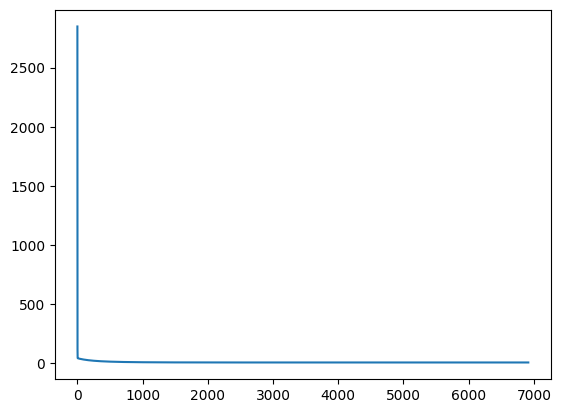

In [16]:
fig_grad_mse, ax_grad_mse = plt.subplots()
ax_grad_mse.plot(mse_list)
plt.show()

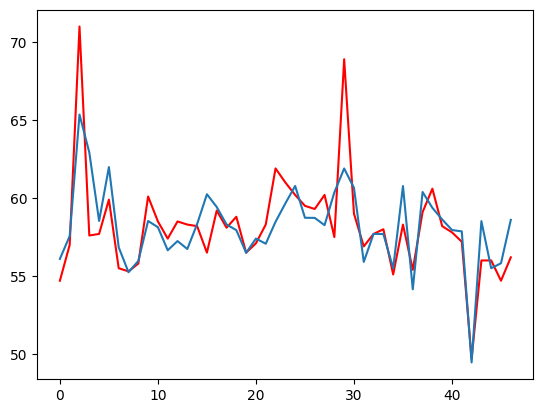

In [17]:
fig, ax_grad = plt.subplots()

ax_grad.plot(y_matrix, color='red')
ax_grad.plot(y_predict_grad)

plt.show()

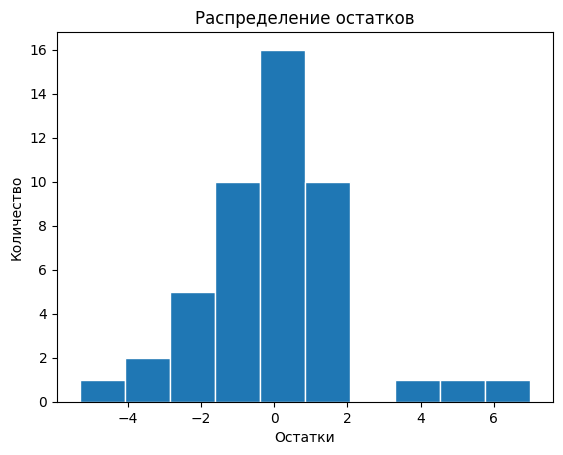

In [18]:
#График распределения остатков
fig, ax_hist_grad = plt.subplots()
ax_hist_grad.hist((y_matrix - y_predict_grad), edgecolor='white')

ax_hist_grad.set_xlabel('Остатки')
ax_hist_grad.set_ylabel('Количество')
ax_hist_grad.set_title('Распределение остатков')

plt.show()

In [19]:
print(w_analytics - w_grad)

[[ 0.0164131 ]
 [-0.00904548]
 [-0.00339615]
 [ 0.00466174]
 [-0.01762234]
 [-0.00320996]
 [-0.00609384]
 [-0.00183537]
 [-0.00920771]
 [ 0.00367829]]


In [20]:
print('MSE аналитического метода:', mse_error(y_matrix, y_predict_analytics))
print('R2 аналитического метода:', r2_coef(y_matrix, y_predict_analytics))
print('--------------------------------------------------')
print('MSE градиентного метода:', mse_error(y_matrix, y_predict_grad))
print('R2 аналитического метода:', r2_coef(y_matrix,y_predict_grad))

MSE аналитического метода: 4.211884987766983
R2 аналитического метода: 0.594910551771069
--------------------------------------------------
MSE градиентного метода: 4.211889570420837
R2 аналитического метода: 0.5949101110219208


In [21]:
x_train = x_normalized[:35]
y_train = y_matrix[:35]

x_test = x_normalized[35:]
y_test = y_matrix[35:]

In [22]:
# Построение модели линейной регрессии с помощью sklearn
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

[[61.57341526]
 [54.01255502]
 [62.07230458]
 [60.37866057]
 [59.89767406]
 [59.47340165]
 [60.72184958]
 [53.95054379]
 [59.41180341]
 [57.01546646]
 [57.16908368]
 [62.29123214]]


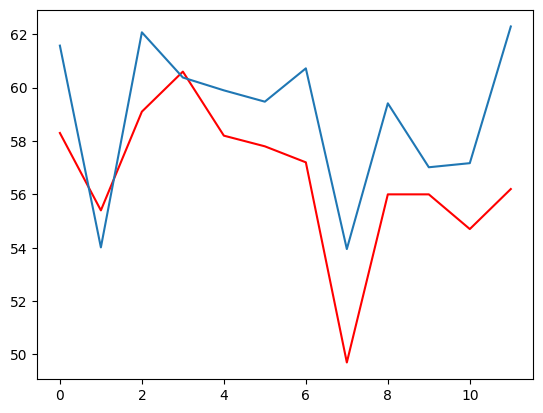

In [23]:
fig, ax_grad = plt.subplots()

ax_grad.plot(y_test, color='red')
ax_grad.plot(y_predict)

plt.show()

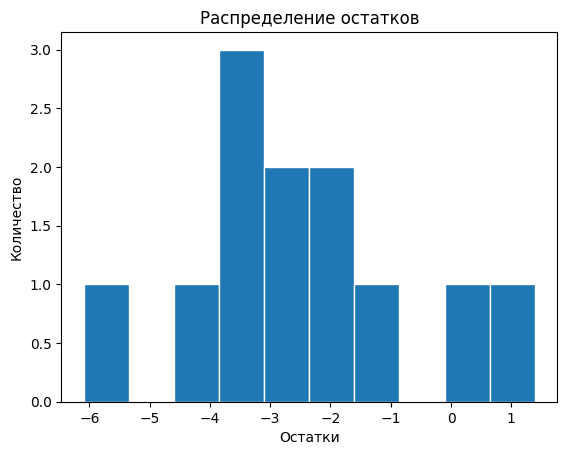

In [24]:
#График распределения остатков
fig, ax_hist_grad = plt.subplots()
ax_hist_grad.hist((y_test - y_predict), edgecolor='white')

ax_hist_grad.set_xlabel('Остатки')
ax_hist_grad.set_ylabel('Количество')
ax_hist_grad.set_title('Распределение остатков')

plt.show()

In [25]:
results = sm.OLS(y_matrix, x_matrix).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              912.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                    1.48e-41
Time:                        23:31:20   Log-Likelihood:                         -131.30
No. Observations:                  47   AIC:                                      280.6
Df Residuals:                      38   BIC:                                      297.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
print('MSE аналитического метода:', mse_error(y_matrix, y_predict_analytics))
print('R2 аналитического метода:', r2_coef(y_matrix, y_predict_analytics))
print('--------------------------------------------------')
print('MSE градиентного метода:', mse_error(y_matrix, y_predict_grad))
print('R2 аналитического метода:', r2_coef(y_matrix,y_predict_grad))
print('--------------------------------------------------')
print('MSE fit-predict:', mse_error(y_test, y_predict))
print('R2 fit-predict:', r2_coef(y_test, y_predict))

MSE аналитического метода: 4.211884987766983
R2 аналитического метода: 0.594910551771069
--------------------------------------------------
MSE градиентного метода: 4.211889570420837
R2 аналитического метода: 0.5949101110219208
--------------------------------------------------
MSE fit-predict: 9.462317652539662
R2 fit-predict: -0.3673869440086226
